In [1]:
from create_epochs import *
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir('/home/amandalin047/ERP_2023Fall/data')
eeglab_raw = mne.io.read_raw_eeglab('S1.set')
eeglab_epochs = mne.read_epochs_eeglab('S1_reref_be_filt_auto_rej.set')

os.chdir('/home/amandalin047/ERP_2023Fall/txt_files')
epochs = epoching(eeglab_raw, eeglab_epochs, 'BDF.txt', 'S1_epoched_elist.txt')

Reading /home/amandalin047/ERP_2023Fall/data/S1.fdt


/tmp/ipykernel_7347/477232475.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeglab_raw = mne.io.read_raw_eeglab('S1.set')


Extracting parameters from /home/amandalin047/ERP_2023Fall/data/S1_reref_be_filt_auto_rej.set...
Not setting metadata
252 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_7347/477232475.py:3: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  eeglab_epochs = mne.read_epochs_eeglab('S1_reref_be_filt_auto_rej.set')


Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '14', '15', '16', '17', '18', '19', '199', '2', '20', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '22', '221', '222', '23', '230', '24', '240', '25', '250', '251', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', 'LVF_

In [4]:
print(epochs.event_id)
bins = list(epochs.event_id.keys())

{'LVF_G_NP_Correct': 154, 'LVF_UG_NP_Correct': 156, 'LVF_G_VP_Correct': 155, 'LVF_UG_VP_Correct': 157, 'RVF_G_NP_Correct': 158, 'RVF_UG_NP_Correct': 160, 'RVF_G_VP_Correct': 159, 'RVF_UG_VP_Correct': 161}


In [5]:
evoked_list = epochs.average(by_event_type=True)
evoked_list

[<Evoked | 'LVF_G_NP_Correct' (average, N=34), -0.1 – 0.999 sec, baseline off, 34 ch, ~344 kB>,
 <Evoked | 'LVF_UG_NP_Correct' (average, N=31), -0.1 – 0.999 sec, baseline off, 34 ch, ~344 kB>,
 <Evoked | 'LVF_G_VP_Correct' (average, N=29), -0.1 – 0.999 sec, baseline off, 34 ch, ~344 kB>,
 <Evoked | 'LVF_UG_VP_Correct' (average, N=31), -0.1 – 0.999 sec, baseline off, 34 ch, ~344 kB>,
 <Evoked | 'RVF_G_NP_Correct' (average, N=31), -0.1 – 0.999 sec, baseline off, 34 ch, ~344 kB>,
 <Evoked | 'RVF_UG_NP_Correct' (average, N=31), -0.1 – 0.999 sec, baseline off, 34 ch, ~344 kB>,
 <Evoked | 'RVF_G_VP_Correct' (average, N=33), -0.1 – 0.999 sec, baseline off, 34 ch, ~344 kB>,
 <Evoked | 'RVF_UG_VP_Correct' (average, N=32), -0.1 – 0.999 sec, baseline off, 34 ch, ~344 kB>]

In [6]:
n_bins = len(evoked_list)
n_chs, n_times = evoked_list[0].get_data().shape
data = np.array([evoked_list[i].get_data(units='uV') for i in range(len(evoked_list))], dtype=object).reshape(n_bins, n_chs, n_times)
data.shape

(8, 34, 1100)

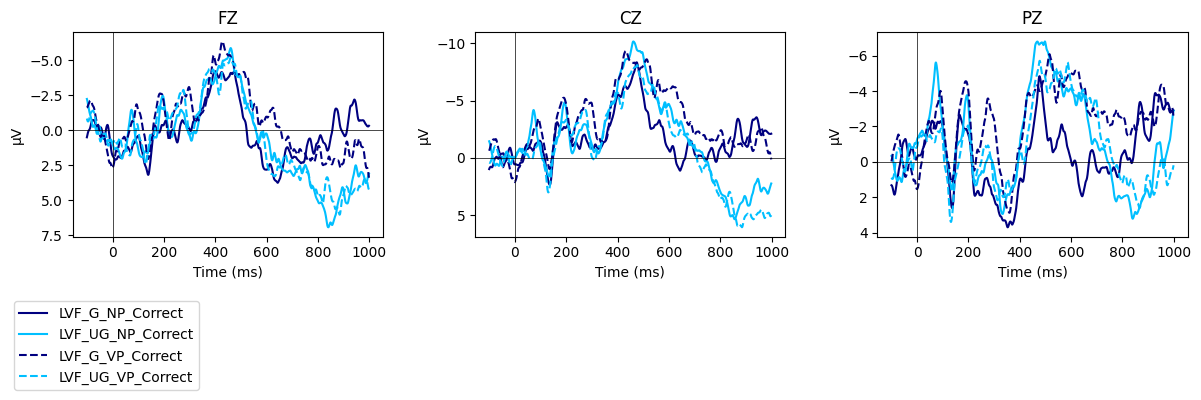

In [7]:
ch_dict = {}
for i, x in enumerate(epochs.ch_names):
    ch_dict[x] = i
    
ch_to_plot = ['FZ', 'CZ', 'PZ']

t = [i for i in range(-100, 1000)]
linestyles = ['solid', 'solid', 'dashed', 'dashed']
colors = ['navy','deepskyblue','navy', 'deepskyblue']

figure, axes = plt.subplots(1,3, figsize=(12, 3))
for ax, ch in zip(axes.copy().flatten(), ch_to_plot):
    for i, x in enumerate(bins[:4]):
        ax.plot(t, data[i][ch_dict[ch]], linestyle=linestyles[i], color=colors[i], label=x)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('µV')
    ax.invert_yaxis()
    hdl, lbl = ax.get_legend_handles_labels()
figure.legend(hdl, lbl, loc='upper left', bbox_to_anchor=[-0.001, 0.001])
figure.tight_layout()
plt.show()

### Testing create_epochs.py on Crystal's subj027

In [8]:
os.chdir('/mnt/c/Users/amand/rerp_2023/Crystal/subj027')
eeglab_raw = mne.io.read_raw_eeglab('subj027.set')
eeglab_epochs = mne.read_epochs_eeglab('subj027_reref_be_filt_auto_rej.set')

epochs = epoching(eeglab_raw, eeglab_epochs, 'Crystal_finalWords.txt', 'subj027_epoched_elist.txt')

Reading /mnt/c/Users/amand/rerp_2023/Crystal/subj027/subj027.fdt


/tmp/ipykernel_7347/3871729927.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeglab_raw = mne.io.read_raw_eeglab('subj027.set')


Extracting parameters from /mnt/c/Users/amand/rerp_2023/Crystal/subj027/subj027_reref_be_filt_auto_rej.set...
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_7347/3871729927.py:3: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['HEOG', 'VEOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeglab_epochs = mne.read_epochs_eeglab('subj027_reref_be_filt_auto_rej.set')


Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '21', '210', '22', '220', '23', '24', '240', '241', '244', '245', '246', '247', '25', '250', '251', '26', '27', '28', '29', '3', 